### Load Data

In [546]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.ensemble import GradientBoostingRegressor


In [547]:
# Read in data
train = pd.read_csv('/users/monicalondon/Downloads/8855_12352_bundle_archive/housing_train.csv')
test = pd.read_csv('/users/monicalondon/Downloads/8855_12352_bundle_archive/housing_test.csv')

In [548]:
# Combine data
frames = [train, test]
data = pd.concat(frames)


### Preview data

In [549]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


In [550]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

### Clean data

In [554]:
# Drop unnecessary columns or columns with too few values
cols_to_drop = ['Id', 'Alley', 'PoolQC', 'MiscFeature', 'Fence', 'MiscVal', 'FireplaceQu', 'GarageYrBlt', 'PoolArea']
def drop_unnecessary_cols(data=data, cols_to_drop=cols_to_drop):
    for i in cols_to_drop:
        data.drop([i], axis=1, inplace=True)
    return data

drop_unnecessary_cols()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,61,0,0,0,0,2,2008,WD,Normal,208500.0
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500.0
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,42,0,0,0,0,9,2008,WD,Normal,223500.0
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,35,272,0,0,0,2,2006,WD,Abnorml,140000.0
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,84,0,0,0,0,12,2008,WD,Normal,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,RM,21.0,1936,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,6,2006,WD,Normal,NaN
1455,160,RM,21.0,1894,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,24,0,0,0,0,4,2006,WD,Abnorml,NaN
1456,20,RL,160.0,20000,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2006,WD,Abnorml,NaN
1457,85,RL,62.0,10441,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,32,0,0,0,0,7,2006,WD,Normal,NaN


In [472]:
# Drop values with no sale price

In [556]:
data['SalePrice'].replace('', np.nan, inplace=True)
data.dropna(subset=['SalePrice'], inplace=True)

#### Deal with missing values

In [560]:
# Which columns have missing values?
[col for col in data.columns if data[col].isnull().any()]

['LotFrontage',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond']

In [561]:
# LotFrontage- fill missing LotFrontage values based on median LotArea/LotFrontage value
data['LotFrontage'] = data['LotFrontage'].fillna((data['LotArea']/data['LotFrontage']).median())

In [563]:
# MasVnrType
print(data['MasVnrType'].value_counts())
# Fill missing MasVnrType values with None (mode)
data['MasVnrType'] = data['MasVnrType'].fillna('None')

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64


In [565]:
# MasVnrArea
print(data['MasVnrArea'].value_counts())
# Fill missing MasVnrArea values with 0 (mode)
data['MasVnrArea'] = data['MasVnrArea'].fillna(0.0)

0.0      861
72.0       8
180.0      8
108.0      8
120.0      7
        ... 
651.0      1
337.0      1
415.0      1
293.0      1
621.0      1
Name: MasVnrArea, Length: 327, dtype: int64


In [568]:
# BsmtQual- there are only 37 missing values
print(len(data) - sum(data['BsmtQual'].value_counts()))
# Fill missing BsmtQual with None, assuming it is empty because there is no basement
data['BsmtQual'] = data['BsmtQual'].fillna('None')

37


In [570]:
# BsmtCond - also only 37 missing values
print(len(data) - sum(data['BsmtCond'].value_counts()))
# Fill missing BsmtCond with None, assuming it is empty because there is no basement
data['BsmtCond'] = data['BsmtCond'].fillna('None')

37


In [572]:
# BsmtExposure - only 38 missing values
print(len(data) - sum(data['BsmtExposure'].value_counts()))
# Fill missing BsmtExposure with None
data['BsmtExposure'] = data['BsmtExposure'].fillna('None')

38


In [574]:
# BsmtFinType1 - only 38 missing values
print(len(data) - sum(data['BsmtFinType1'].value_counts()))
# Fill missing BsmtFinType1 with None
data['BsmtFinType1'] = data['BsmtFinType1'].fillna('None')

Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64

In [576]:
# BsmtFinType2 - only 38 missing values
print(len(data) - sum(data['BsmtFinType2'].value_counts()))
# Fill missing BsmtFinType2 with None
data['BsmtFinType2'] = data['BsmtFinType2'].fillna('None')

38


In [584]:
# Electrical - just 1 missing value
# Fill missing Electrical value with mode (SBrkr)
print(data['Electrical'].value_counts())
print(len(data) - sum(data['Electrical'].value_counts()))
data['Electrical'] = data['Electrical'].fillna('SBrkr')

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64
1


In [587]:
# GarageType - 81 missing values. It is reasonable to believe that these homes don't have garages
# Fill missing GarageType with None
print(len(data) - sum(data['GarageType'].value_counts()))
data['GarageType'] = data['GarageType'].fillna('None')

0
0.0


In [588]:
# GarageQual - 81 missing values.
# Fill missing GarageQual with None
print(len(data) - sum(data['GarageQual'].value_counts()))
data['GarageQual'] = data['GarageQual'].fillna('None')

81


In [589]:
# Fill missing GarageCond with None
print(len(data) - sum(data['GarageCond'].value_counts()))
data['GarageCond'] = data['GarageCond'].fillna('None')

81


In [590]:
# Fill missing GarageFinish with None
print(len(data) - sum(data['GarageFinish'].value_counts()))
data['GarageFinish'] = data['GarageFinish'].fillna('None')

81


#### Change data types

In [591]:
# Change these numbers to strings
data['MSSubClass'] = data['MSSubClass'].astype(str)
data['YrSold'] = data['YrSold'].astype(str)
data['MoSold'] = data['MoSold'].astype(str)

In [598]:
# Change KitchenQual to numeric
data['KitchenQual'].unique()
data['KitchenQual'] = np.where((data.KitchenQual == 'Ex'), 5,data.KitchenQual)
data['KitchenQual'] = np.where((data.KitchenQual == 'Gd'), 4,data.KitchenQual)
data['KitchenQual'] = np.where((data.KitchenQual == 'TA'), 3,data.KitchenQual)
data['KitchenQual'] = np.where((data.KitchenQual == 'Fa'), 2,data.KitchenQual)

In [602]:
# Change ExterQual to numeric
data['ExterQual'] = np.where((data.ExterQual == 'Ex'), 5,data.ExterQual)
data['ExterQual'] = np.where((data.ExterQual == 'Gd'), 4,data.ExterQual)
data['ExterQual'] = np.where((data.ExterQual == 'TA'), 3,data.ExterQual)
data['ExterQual'] = np.where((data.ExterQual == 'Fa'), 2,data.ExterQual)

In [603]:
# Change ExterCond to numeric
data['ExterCond'] = np.where((data.ExterCond == 'Ex'), 5,data.ExterCond)
data['ExterCond'] = np.where((data.ExterCond == 'Gd'), 4,data.ExterCond)
data['ExterCond'] = np.where((data.ExterCond == 'TA'), 3,data.ExterCond)
data['ExterCond'] = np.where((data.ExterCond == 'Fa'), 2,data.ExterCond)
data['ExterCond'] = np.where((data.ExterCond == 'Po'), 1,data.ExterCond)

### EDA

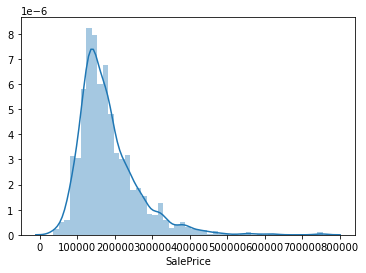

In [595]:
sns.distplot(data['SalePrice']);

We can see that the Sale Price is not normally distributed, so we will need to do a log transformation

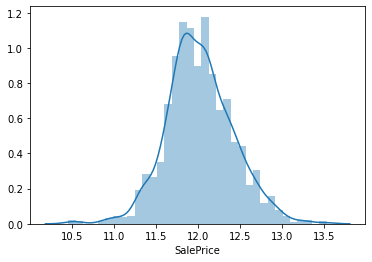

In [596]:
sns.distplot(np.log1p(data['SalePrice']));

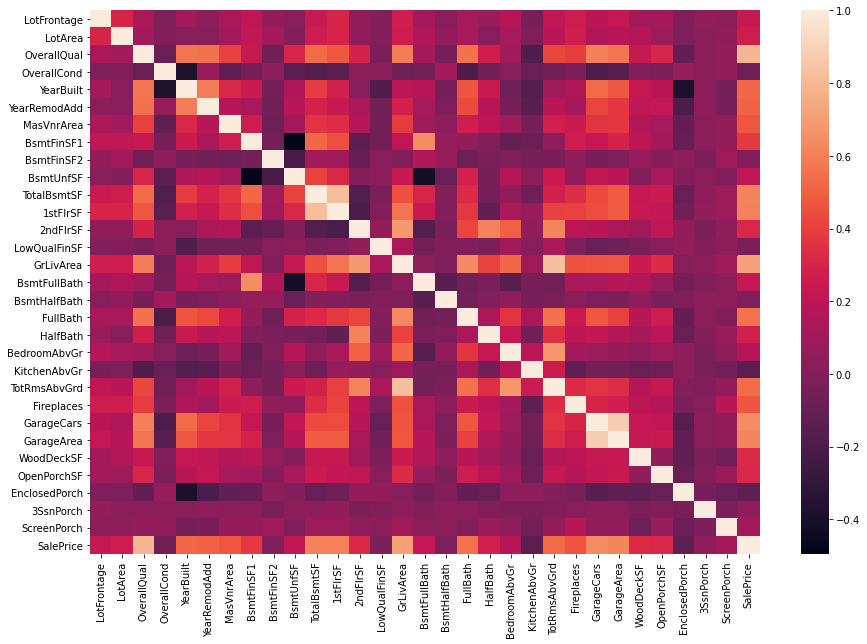

In [601]:
# Plot heatmap of feature correlation
plt.figure(figsize = (15,10))
sns.heatmap(data.corr())

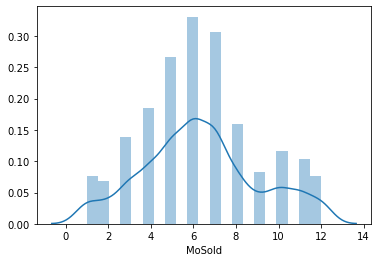

In [605]:
# Distribution of months sold - we can see that summer months have the highest volume of sales
sns.distplot(data['MoSold']);

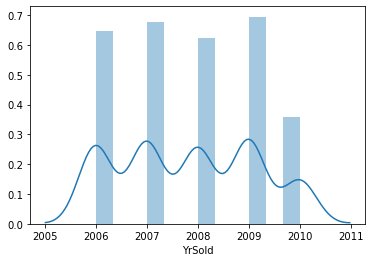

In [608]:
# Distribution of Year Sold
sns.distplot(data['YrSold']);

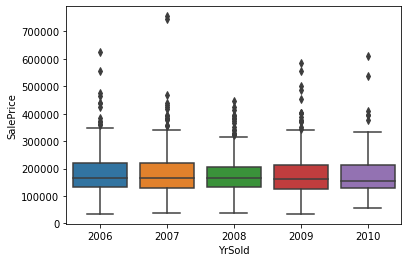

In [609]:
# Boxplot of sale prices by year sold
sns.boxplot(x='YrSold', y='SalePrice', data=data)

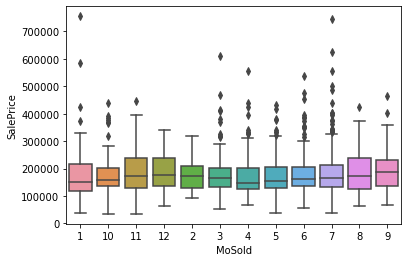

In [610]:
sns.boxplot(x='MoSold', y='SalePrice', data=data)

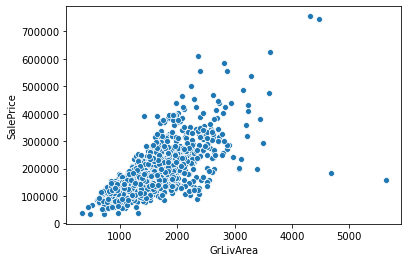

In [611]:
# Living area vs Sale Price
sns.scatterplot(x='GrLivArea', y='SalePrice', data=data);

As expected, there is a clear positive correlation between GrLivArea, which represents square footage, and the sale price.

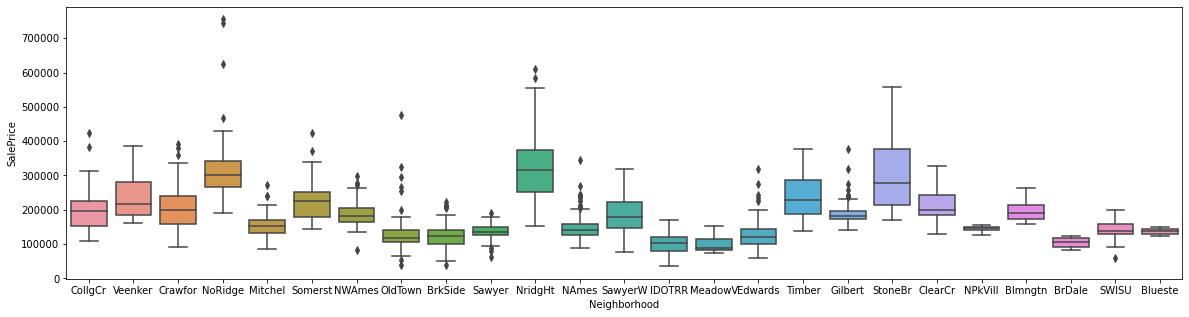

In [613]:
plt.figure(figsize=(20,5))
sns.boxplot(x='Neighborhood', y='SalePrice', data=data);

We can see that there is a higher range in pricing for some of the higher priced neighborhoods

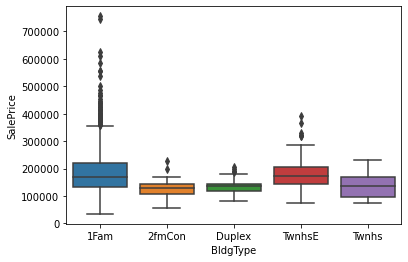

In [614]:
sns.boxplot(x='BldgType', y='SalePrice', data=data);

Single Family Homes, represented as 1Fam, have the highest range of sale prices.

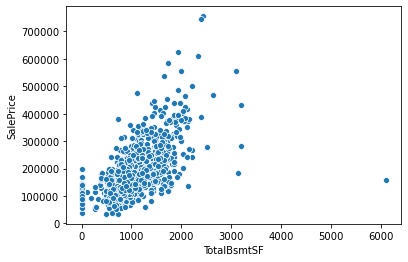

In [615]:
sns.scatterplot(x='TotalBsmtSF', y='SalePrice', data=data);

Total basement square footage also appears positively correlated with sales price.

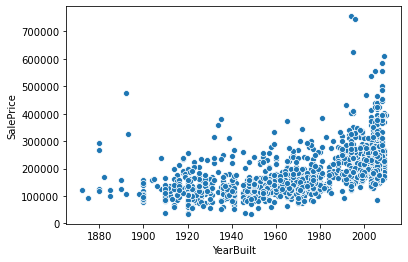

In [630]:
sns.scatterplot(x='YearBuilt', y='SalePrice', data=data);

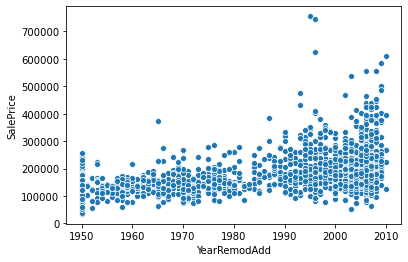

In [631]:
sns.scatterplot(x='YearRemodAdd', y='SalePrice', data=data);

### Baseline Model
Based on domain knowledge, we will use the following features for our baseline model
1) Neighorhood
2) GrLivArea
3) OverallQual
4) LotArea
5) YearRemodAdd
6) BldgType
7) TotalBsmtSF

In [616]:
# Convert neighborhood to categorical
neighborhood_cat = pd.get_dummies(data.Neighborhood, prefix='neigh')
data2 = pd.concat([data, pd.get_dummies(data['Neighborhood'], prefix='neigh', drop_first=True)], axis=1)
data2.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,neigh_NoRidge,neigh_NridgHt,neigh_OldTown,neigh_SWISU,neigh_Sawyer,neigh_SawyerW,neigh_Somerst,neigh_StoneBr,neigh_Timber,neigh_Veenker
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,0,0,0,0,0
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,0,0,0,0,1
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,0,0,0,0,0
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,0,0,0,0,0
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,1,0,0,0,0,0,0,0,0,0


In [618]:
# Convert BldgType to categorical
data2 = pd.concat([data2, pd.get_dummies(data2['BldgType'], prefix='BldgType', drop_first=True)], axis=1)

In [619]:
# Train test split
# Separate X and y
X = data2[['neigh_Blueste', 'neigh_BrDale', 'neigh_BrkSide', 'neigh_ClearCr', 
          'neigh_CollgCr', 'neigh_Crawfor', 'neigh_Edwards', 'neigh_Gilbert', 'neigh_IDOTRR', 'neigh_MeadowV',
          'neigh_Mitchel', 'neigh_NAmes', 'neigh_NoRidge', 'neigh_NridgHt', 'neigh_OldTown', 'neigh_SWISU', 'neigh_Sawyer', 'neigh_SawyerW', 'neigh_Somerst', 
          'neigh_StoneBr', 'neigh_Timber', 'neigh_Veenker', 'BldgType_2fmCon', 'BldgType_Duplex', 
          'BldgType_Twnhs', 'BldgType_TwnhsE','GrLivArea', 'OverallQual', 'LotArea', 'YearRemodAdd', 'TotalBsmtSF']]
y = np.log1p(data2['SalePrice'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [622]:
# Linear Regression Baseline Model
model_one = LinearRegression()
print('Model got an average score of R2: {}'.format(
    cross_val_score(model_one, X_train, y_train, cv=10).mean()))

Model got an average score of R2: 0.8075653629968738


In [623]:
# Random Forest Regressor Baseline Model
rf = RandomForestRegressor()
print('Model got an average score of R2: {}'.format(
    cross_val_score(rf, X_train, y_train, cv=10).mean()))

Model got an average score of R2: 0.8200731993926016


In [633]:
# Gradient Boosted Regressor Baseline Model
gbr = GradientBoostingRegressor()
print('Model got an average score of R2: {}'.format(
    cross_val_score(gbr, X_train, y_train, cv=10).mean()))

Model got an average score of R2: 0.8422633856915827


### Feature Engineering
Now we will do some more feature engineering to improve our model

In [624]:
# Combine full and half bathrooms
data2['Total_Bathrooms'] = data2['FullBath'] + data2['HalfBath']*.5

In [625]:
# Drop full & half bathrooms
data2.drop(['FullBath'], axis=1, inplace=True)
data2.drop(['HalfBath'], axis=1, inplace=True)

In [626]:
# Combine basement full and half bathrooms
data2['Basement_Total_Bathrooms'] = data2['BsmtFullBath'] + data2['BsmtHalfBath']*.5

In [627]:
# Drop basement full & half bathrooms
data2.drop(['BsmtFullBath'], axis=1, inplace=True)
data2.drop(['BsmtHalfBath'], axis=1, inplace=True)

In [629]:
# What percent of properties have been remodeled?
(data2['YearRemodAdd'] == data2['YearBuilt']).sum()/len(data)

0.5232876712328767

In [ ]:
# Combine Year Built and Year Remodeled


In [637]:
data2['Condition2'].unique()

array(['Norm', 'Artery', 'RRNn', 'Feedr', 'PosN', 'PosA', 'RRAn', 'RRAe'],
      dtype=object)

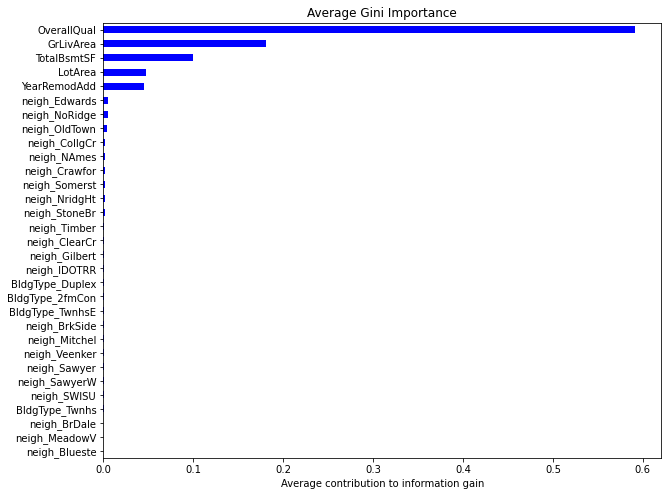

In [531]:
# Plot the feature importance
feat_scores = pd.Series(rf.feature_importances_,
                           index=X.columns)
feat_scores = feat_scores.sort_values()
ax = feat_scores.plot(kind='barh', 
                      figsize=(10,8),
                      color='b')
ax.set_title('Average Gini Importance')
ax.set_xlabel('Average contribution to information gain');